In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [9]:
final_df = pd.DataFrame()
test_final_df = pd.DataFrame()
i = 1
for file in os.listdir('./csvfiles'):
    if i <= 75:
        df = pd.read_csv(f'./csvfiles/{file}')
        df = df[18:-18]
        split = file.split('_')
        split[2] = split[2].split('.')[0]
        split[1] = float(split[1])*10000
        df['HCl_flux'] = split[1]
        df['time'] = int(split[2])
        final_df = pd.concat([final_df,df], ignore_index=True)
    else:
        df = pd.read_csv(f'./csvfiles/{file}')
        df = df[18:-18]
        split = file.split('_')
        split[2] = split[2].split('.')[0]
        split[1] = float(split[1])*10000
        df['HCl_flux'] = split[1]
        df['time'] = int(split[2])
        test_final_df = pd.concat([test_final_df,df], ignore_index=True)
    i+=1

In [10]:
# final_df
test_final_df

,x1,y1,z1,x2,y2,z2,Output,HCl_flux,time
0,0.0235,0.0106,0.020,0.0235,0.0106,0.025,0.004700,17.0,11
1,0.0235,0.0106,0.035,0.0235,0.0106,0.040,0.004657,17.0,11
2,0.0235,0.0106,0.050,0.0235,0.0106,0.055,0.004704,17.0,11
3,0.0235,0.0107,0.020,0.0235,0.0107,0.025,0.004684,17.0,11
4,0.0235,0.0107,0.035,0.0235,0.0107,0.040,0.004656,17.0,11
...,...,...,...,...,...,...,...,...,...
45355,0.0235,0.0293,0.035,0.0235,0.0293,0.040,0.004663,30.0,6
45356,0.0235,0.0293,0.050,0.0235,0.0293,0.055,0.004692,30.0,6
45357,0.0235,0.0294,0.020,0.0235,0.0294,0.025,0.004675,30.0,6
45358,0.0235,0.0294,0.035,0.0235,0.0294,0.040,0.004656,30.0,6


In [11]:
model_df = pd.DataFrame(columns=['HCl_flux', 'time', 'y', 'z_length'])
model_df['HCl_flux'], model_df['time'], model_df['y'], model_df['z'], model_df['z_length'] = final_df.iloc[:,7], final_df.iloc[:,8], final_df.iloc[:,1]*100, final_df.iloc[:,2]*1000, final_df.iloc[:,6]*100000000

test_model_df = pd.DataFrame(columns=['HCl_flux', 'time', 'y', 'z_length'])
test_model_df['HCl_flux'], test_model_df['time'], test_model_df['y'],  test_model_df['z'], test_model_df['z_length'] = test_final_df.iloc[:,7], test_final_df.iloc[:,8], test_final_df.iloc[:,1]*100, test_final_df.iloc[:,2]*1000, test_final_df.iloc[:,6]*100000000

In [12]:
x_train = model_df.loc[:, ~model_df.columns.isin(['z_length'])] #removing time as well right now
y_train = model_df[['z_length']]
x_test = test_model_df.loc[:, ~test_model_df.columns.isin(['z_length'])]
y_test = test_model_df[['z_length']]

In [6]:
# from sklearn.preprocessing import StandardScaler

# scaler_x_train = StandardScaler()
# X_scale_arr = scaler_x_train.fit_transform(x_train)
# df_scaledX = pd.DataFrame(X_scale_arr, columns=x_train.columns)

# scaler_y_train = StandardScaler()
# y_scale_arr = scaler_y_train.fit_transform(y_train)
# df_scaledy = pd.DataFrame(y_scale_arr, columns=y_train.columns)

# scaler_x_test = StandardScaler()
# X_scale_t_arr = scaler_x_test.fit_transform(x_test)
# df_scaledX_t = pd.DataFrame(X_scale_t_arr, columns=x_test.columns)

# scaler_y_test = StandardScaler()
# y_scale_t_arr = scaler_y_test.fit_transform(y_test)
# df_scaledy_t = pd.DataFrame(y_scale_t_arr, columns=y_test.columns)


# X_train_scaled_reshaped = X_scale_arr.reshape(X_scale_arr.shape[0],1,X_scale_arr.shape[1])
# X_train_scaled_reshaped.shape

# X_test_scaled_reshaped = X_scale_t_arr.reshape(X_scale_t_arr.shape[0],1,X_scale_t_arr.shape[1])
# X_test_scaled_reshaped.shape

In [13]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train_arr = y_train.to_numpy()
y_test_arr = y_test.to_numpy()
X_train_reshaped = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
X_train_reshaped.shape

X_test_reshaped = x_test.reshape(x_test.shape[0],1,x_test.shape[1])
X_test_reshaped.shape

(45360, 1, 4)

In [8]:
# #LSTM
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from keras.callbacks import EarlyStopping


# def create_lstm_model(input_shape):
#     model = Sequential()
#     model.add(LSTM(200, input_shape=input_shape, return_sequences=True, activation='relu'))
#     # model.add(LSTM(100,  dropout=0.5, return_sequences=True, activation='relu'))
#     model.add(LSTM(40,dropout=0.2, return_sequences=True, activation='relu'))
#     model.add(LSTM(20, activation='relu'))
#     model.add(Dense(1))  # Assuming 2 target variables
#     model.compile(optimizer='adam', loss='mae')
#     return model

# model = create_lstm_model(input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001, verbose=1)
# history = model.fit(X_train_reshaped, y_train_arr, epochs=50, batch_size=64, verbose=1, validation_data=(X_test_reshaped, y_test_arr), 
#                     callbacks=[early_stopping]
#                 )

# # Predict on the test set
# y_pred = model.predict(X_test_reshaped)

# # predictions = scaler_y_test.inverse_transform(y_pred)
# # x_test_plot = scaler_x_test.inverse_transform(X_test_scaled_reshaped.reshape(X_test_scaled_reshaped.shape[0],X_test_scaled_reshaped.shape[2]))

In [9]:
# y_pred = model.predict(X_train_reshaped)

In [10]:
# # Without K-fold Cross validation, RF

# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# #after certain value, no of trees doesn't matter
# model = RandomForestRegressor(n_estimators=50, random_state=42)

# model.fit(x_train, y_train.ravel())
# y_pred = model.predict(x_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred).mean()
# r2 = r2_score(y_test, y_pred).mean()

# print("Mean Squared Error for each target:", mse)
# print("Variance Weighted R^2 Score:", r2)

# # Detailed R^2 Score for each target
# # r2_individual = r2_score(y_train, y_pred, multioutput='raw_values')
# # print("R^2 Score for each target:", r2_individual)

In [11]:
#  # Fitting Polynomial Regression to the dataset
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# poly = PolynomialFeatures(degree=50)
# X_poly = poly.fit_transform(x_train)
 
# poly.fit(X_poly, y_train)
# lin2 = LinearRegression()
# lin2.fit(X_poly, y_train)
# X_poly_test = poly.fit_transform(x_test)
# y_pred = lin2.predict(X_poly_test)

In [12]:
# #FNN
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from keras.callbacks import EarlyStopping

# model = Sequential()
# model.add(Dense(units=50, activation='relu', input_dim=x_train.shape[1]))
# # model.add(Dense(units=50, activation='relu'))
# model.add(Dense(units=10, activation='relu'))
# model.add(Dense(units=1))

# # Compiling the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Training the model
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001, verbose=1)
# model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=1,
#           callbacks=[early_stopping]
#           )

# # Predicting
# y_pred = model.predict(x_test)

Predictions

In [13]:
# y_pred_ = y_pred/10000000
# y_test_unscal = y_test/10000000

In [14]:
# import matplotlib.pyplot as plt
# plt.figure()
# # plt.xlim(0,0)
# plt.scatter(y_test_unscal[0:600],x_test[0:600,3]/1000, c='red',label=f'True values')
# plt.scatter(y_pred_[0:600],x_test[0:600,3]/1000,c='blue',label=f'Predicted values')
# plt.show()

In [15]:
# plt.figure()
# turn = 1
# #x = y-axis(3d), height=0.02 to 0.025..., y = z-axis(3d)
# for x, height in zip(x_test[:600,2], y_pred_[:600,0]/10):
#     if turn==1:

#         end_point = (x, 0.0225)
#             # print(end_point)

#         len = round((0.0225-(height/2)),4)
#         start_point = (x, len)
#             # print(start_point)
#         plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], linewidth=1, color='g')

#         len = round((0.0225 + (height/2)),4)
#         end_point = (x, len)
#             # print(end_point)

#         start_point = (x, 0.0225)
#             # print(start_point)

#         plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], linewidth=1, color='g')
#         turn = 2
#     elif turn==2:
#         end_point = (x, 0.0375)
#             # print(end_point)

#         len = round((0.0375-(height/2)),4)
#         start_point = (x, len)
#             # print(start_point)

#         plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]],linewidth=1, color='b')

#         len = round((0.0375 + (height/2)),4)
#         end_point = (x, len)
#             # print(end_point)


#         start_point = (x, 0.0375)
#             # print(start_point)
#         plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], linewidth=1, color='b')
#         turn = 3

#     else:
#         end_point = (x, 0.0525)
#             # print(end_point)
#         len = round((0.0525-(height/2)),4)
#         start_point = (x, len)
#             # print(start_point)
#         plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], linewidth=2, color='k')

#         len = round((0.0525 + (height/2)),4)
#         end_point = (x, len)
#             # print(end_point)
#         start_point = (x, 0.0525)
#             # print(start_point)

#         plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], linewidth=2, color='k')
#         turn = 1
#         # break

# plt.ylim(0.01,.06)
# plt.show()

Just the 5th time step for each distinct flux value

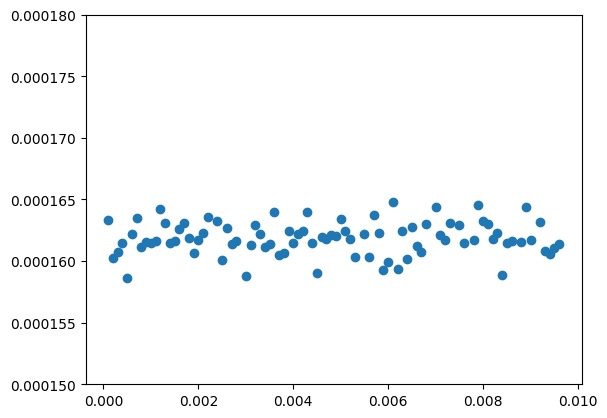

In [85]:
#Just last time intervals - Just avg
i = 1
turn = 0
avg_df = pd.DataFrame()
for folder in os.listdir('./csvfiles'):
    for file in sorted(os.listdir(f'./csvfiles/{folder}'), key=len):
        if i%5==0:
            df = pd.read_csv(f'./csvfiles/{folder}/{file}')
            df = df[30:-30]
            split = file.split('_')
            split[2] = split[2].split('.')[0]
            split[1] = float(split[1])
            avg = df.mean()
            dict = {'HCl_flux':split[1],'time':float(split[2]), 'Average Roughness':0.005 - avg[6]}
            avg_df = avg_df._append(dict, ignore_index=True)
        i+=1
# avg_df = avg_df.sort_values(by='HCl_flux')
plt.ylim(0.00015, 0.00018)
plt.scatter(avg_df.iloc[:,0], avg_df.iloc[:,2])

In [102]:
avg_df.head(20)

,HCl_flux,time,Average Roughness
0,0.0001,200.0,0.000163
1,0.0002,100.0,0.000160
2,0.0003,66.0,0.000161
3,0.0004,50.0,0.000161
4,0.0005,40.0,0.000159
5,0.0006,33.0,0.000162
6,0.0007,28.0,0.000163
7,0.0008,25.0,0.000161
8,0.0009,22.0,0.000162
9,0.0010,20.0,0.000161


In [110]:
avg_df_1 = pd.DataFrame()
for ndex,row in avg_df.iterrows():
    if(row['Average Roughness']>0.0001):
        avg_df_1 = avg_df_1._append(row, ignore_index=True)

avg_df = avg_df_1

In [111]:
avg_df_1

,HCl_flux,time,Average Roughness
0,0.0001,200.0,0.000163
1,0.0002,100.0,0.000160
2,0.0003,66.0,0.000161
3,0.0004,50.0,0.000161
4,0.0005,40.0,0.000159
...,...,...,...
83,0.0092,2.0,0.000163
84,0.0093,2.0,0.000161
85,0.0094,2.0,0.000161
86,0.0095,2.0,0.000161


In [150]:
from sklearn.model_selection import train_test_split
x = avg_df.loc[:, ~avg_df.columns.isin(['Average Roughness'])] #removing time as well right now
y =avg_df[['Average Roughness']]*10000000000

x_train_avg, x_test_avg, y_train_avg, y_test_avg = train_test_split(x,y,test_size=0.3, random_state=42)

In [154]:
# FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Input(shape= (x_train_avg.shape[1],)))
model.add(Dense(units=4096, 
                activation='relu'))
model.add(Dense(units=2048, 
                activation='relu'))
model.add(Dense(units=1024, 
                activation='relu'))
model.add(Dense(units=512, 
                activation='relu'))

model.add(Dense(units=256, 
                activation='relu'))
model.add(Dense(units=128, 
                activation='relu'
                ))
model.add(Dense(units=64, 
                activation='relu'
                ))
model.add(Dense(units=32, 
                activation='relu'
                ))
model.add(Dropout(0.1))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mape')

# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=20, min_delta=0.001, verbose=1)
model.fit(x_train_avg, y_train_avg, epochs=500, batch_size=1, validation_data=(x_test_avg, y_test_avg), verbose=1,
          callbacks=[early_stopping]
          )

# Predicting
y_pred_avg = model.predict(x_test_avg)

Epoch 1/500
61/61 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 99.5909 - val_loss: 89.4177
Epoch 2/500
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 83.6758 - val_loss: 85.0804
Epoch 3/500
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 70.0621 - val_loss: 84.1878
Epoch 4/500
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 77.3456 - val_loss: 68.5024
Epoch 5/500
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 55.6011 - val_loss: 34.0820
Epoch 6/500
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 15.7129 - val_loss: 13.9457
Epoch 7/500
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 14.8697 - val_loss: 14.0643
Epoch 8/500
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 9.6813 - val_loss: 11.6016
Epoch 9/500
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 16.1309 - val_loss: 9.2806
Epoch 10/500
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 13.5246 - val_loss: 13.2550
Epoch 11/500
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 11.0170 - val_loss: 8.3953
Epoch 12/500
61/61 ━━━

In [143]:
y_pred_avg_train = model.predict(x_train_avg)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [19]:
# plt.scatter(x_train_avg.iloc[:,0], y_train_avg/100000000, c='r')
# plt.scatter(x_train_avg.iloc[:,0], y_pred_avg/100000000, c='b')

In [25]:
# #RNN / LSTM
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, LSTM, Input
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras import backend as K

# # Assuming your data is currently in 2D shape (samples, features)
# # Reshape the data to be 3D (samples, timesteps, features)
# # Here, timesteps = 1 because we assume each sample is a single time step
# x_train_avg_reshaped = np.reshape(x_train_avg, (x_train_avg.shape[0], 1, x_train_avg.shape[1]))
# x_test_avg_reshaped = np.reshape(x_test_avg, (x_test_avg.shape[0], 1, x_test_avg.shape[1]))

# def custom_loss_function(y_true, y_pred):
#     error = abs(y_pred - y_true)
#     error = error / K.mean(y_true)
#     loss = K.mean(error, axis=-1)
#     return loss

# model = Sequential()
# model.add(Input(shape=(1, x_train_avg.shape[1])))
# model.add(LSTM(units=200, activation='relu', return_sequences=True))
# model.add(LSTM(units=100, activation='relu', dropout=0.3, return_sequences=True))
# model.add(LSTM(units=50, activation='relu'))
# model.add(Dense(units=20, activation='relu'))
# model.add(Dense(units=1))

# # Compiling the model
# model.compile(optimizer='adam', loss='mape')

# # Training the model
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, min_delta=0.001, verbose=1)
# model.fit(x_train_avg_reshaped, y_train_avg, epochs=100, batch_size=1, validation_data=(x_test_avg_reshaped, y_test_avg), verbose=1,
#           callbacks=[early_stopping]
#           )

# # Predicting
# y_pred_avg = model.predict(x_test_avg_reshaped)


Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 24710.0449 - val_loss: 15506.9111
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23321.8184 - val_loss: 27738.4180
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18735.6055 - val_loss: 42215.4922
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18556.9941 - val_loss: 46860.4961
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18087.7773 - val_loss: 53043.7227
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17502.4258 - val_loss: 53929.1211
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16152.0371 - val_loss: 49538.9844
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19326.5879 - val_loss: 45782.5898
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16578.3184 - val_loss: 42846.8477
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19457.4844 - val_loss: 43649.7656
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18851.08

In [26]:
y_pred_avg = model.predict(x_train_avg_reshaped)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


(0.0, 0.0002)

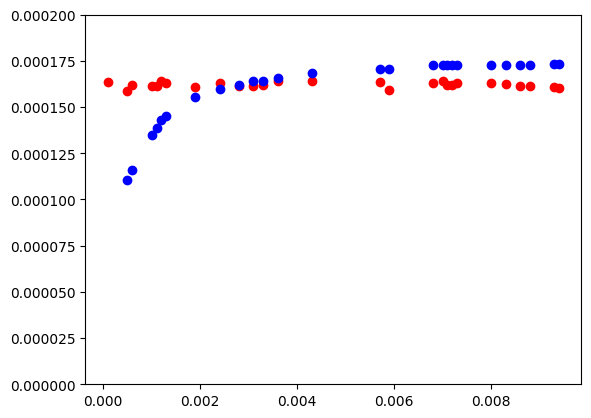

In [155]:
plt.scatter(x_test_avg.iloc[:,0], y_test_avg/10000000000, c='r')
plt.scatter(x_test_avg.iloc[:,0], y_pred_avg/10000000000, c='b')
plt.ylim(0,0.0002)

(0.0001, 0.0002)

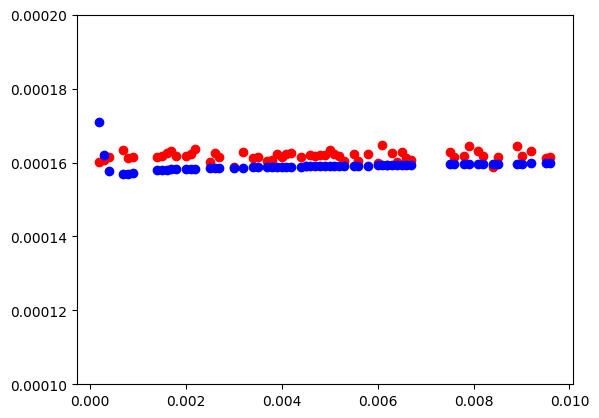

In [144]:
plt.scatter(x_train_avg.iloc[:,0], y_train_avg/100000000, c='r')
plt.scatter(x_train_avg.iloc[:,0], y_pred_avg_train/100000000, c='b')
plt.ylim(0.0001,0.0002)